# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home.

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [ ]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [ ]:
# TODO: Load the dataset for training
with open('Data/output.json', 'r') as file:
  dataset = json.load(file)

train_df = pd.DataFrame(dataset)
train_df.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,13:07:00,14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,15:13:00,16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,20:41:00,20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,21:24:00,21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,23:38:00,23:58:00,19.48


In [ ]:
# TODO: Load the dataset for testing
with open('Data/output_test.json', 'r') as file:
  dataset = json.load(file)
test_df = pd.DataFrame(dataset)
test_df.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,11:58:00,12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,21:58:00,22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,20:05:00,20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,17:39:00,18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,13:16:00,13:19:00,15.08


In [ ]:
# print out the number of unique users and also randomly select one user
# TODO
num_unique_users = train_df['user_id'].nunique()

random_user = np.random.choice(train_df['user_id'].unique())

print((num_unique_users, random_user))

(60, 8)


In [ ]:
!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 31.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=6c4963a8af008e89f66bd65ed96c31a9d2a6f82153d8dafad5ffe086b3138468
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [ ]:
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data
user_data = train_df[train_df['user_id'] == random_user]
print(user_data[['dest lat', 'dest lon']])
# TODO

      dest lat  dest lon
2088    35.505    51.180
2089    35.625    51.125
2090    35.785    51.315
2091    35.700    51.210
2092    35.625    51.125
...        ...       ...
2406    35.625    51.125
2407    35.565    51.060
2408    35.625    51.125
2409    35.750    51.385
2410    35.700    51.210

[323 rows x 2 columns]


In [ ]:
# Sample output:
map_ = KeplerGl(height=600, data={'user_id': user_data[['dest lat', 'dest lon']]})
map_

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'user_id':       dest lat  dest lon
2088    35.505    51.180
2089    35.625    51.125
2090    3…

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [ ]:
# TODO
train_df['st'] = pd.to_datetime(train_df['start_time'])
train_df['et'] = pd.to_datetime(train_df['end_time'])

test_df['st'] = pd.to_datetime(test_df['start_time'])
test_df['et'] = pd.to_datetime(test_df['end_time'])

train_df['start_hour'] = pd.to_datetime(train_df['start_time']).dt.hour
test_df['start_hour'] = pd.to_datetime(test_df['start_time']).dt.hour


train_df['duration'] = (train_df['st'] - train_df['et']).dt.total_seconds() // 60
test_df['duration'] = (test_df['st'] - test_df['et']).dt.total_seconds() // 60

selected_features = ['user_id', 'Day', 'origin lat', 'origin lon', 'start_hour', 'duration']
X_train_knn = train_df[selected_features]
Y_train_knn = train_df[['dest lat', 'dest lon']]

X_test_knn = test_df[selected_features]
Y_test_knn = test_df[['dest lat', 'dest lon']]





In [ ]:
# print out the shape of the train and test dataframes
# TODO
print("Training set shape:", (X_train_knn.shape, Y_train_knn.shape))
print("Testing set shape:", (X_test_knn.shape, Y_test_knn.shape))

Training set shape: ((17994, 6), (17994, 2))
Testing set shape: ((4499, 6), (4499, 2))


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [ ]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need

class NearestNeighbor():
    def __init__(self, k=5):
        self.k = k
        self.train_X = None
        self.train_y = None
        pass

    def fit(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
        pass

    def predict(self, x):
        predictions = []
        for idx in range(x.shape[0]):
          distances = np.linalg.norm(self.train_X - x.iloc[idx, :], axis=1)
          k_nearest_indices = np.argsort(distances)[:self.k]
          k_nearest_neighbors = self.train_y.iloc[k_nearest_indices]
          prediction = np.mean(k_nearest_neighbors, axis=0)
          predictions.append(prediction.round(3))
        return pd.DataFrame(predictions, columns=self.train_y.columns)
        pass


In [ ]:
# Fit the model on training data
# TODO
knn_model = NearestNeighbor(k=1)
knn_model.fit(X_train_knn, Y_train_knn)

In [ ]:
def accuracy_calc(predictions, y_true):
  m = len(predictions)
  correct = 0
  for idx in range(m):
    if predictions[idx][0] == y_true[idx][0] and predictions[idx][1] == y_true[idx][1]:
      correct += 1
  return correct / m

In [ ]:
# Calculate the accuracy on training data
# TODO
training_predictions = knn_model.predict(X_train_knn)
# print(training_predictions)
# training_predictions.head()


In [ ]:
print(accuracy_calc(training_predictions.to_numpy(), Y_train_knn.to_numpy()) * 100)

99.24419250861398


In [ ]:
# Calculate the accuracy on test data
# TODO
test_predictions = knn_model.predict(X_test_knn)

In [ ]:
print(accuracy_calc(test_predictions.to_numpy(), Y_test_knn.to_numpy()) * 100)

52.411647032673926


**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

No because this type of problem has numerous features which are not that easy to handle and KNN's approach is simple for this type of problem, And as we see it has overfitting problem and train data is nearly 100 accurate but test data has not got a satisfactory result

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [ ]:
%pip install xgboost

In [ ]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder():
    def __init__(self):
        self.cnt = 0
        self.tran = {}
        self.inv_tran = {}
        pass

    def fit(self, y):
        Y_ = y.to_numpy()
        for idx in range(len(Y_)):
          if (Y_[idx][0], Y_[idx][1]) not in self.tran:
            self.tran[(Y_[idx][0], Y_[idx][1])] = self.cnt
            self.inv_tran[self.cnt] = Y_[idx]
            self.cnt += 1
        return self.transform(Y_)
        pass

    def transform(self, y):
        y_out = [self.tran[(y[idx][0], y[idx][1])] for idx in range(len(y))]
        return y_out
        pass

    def inverse_transform(self, enc):
        y_out = []
        for idx in range(len(enc)):
          y_out.append(self.inv_tran[enc[idx]])
        return np.array(y_out)
        pass


In [ ]:
# TODO: fit the Encoder on training data
encoder = Encoder()
Y_xgb = encoder.fit(Y_train_knn)
X_xgb = np.array(X_train_knn.to_numpy(), dtype=np.float64)



In [ ]:
# TODO: transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier()
classifier.fit(X_xgb, Y_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# TODO: print out train-data accuracy
train_predictions = encoder.inverse_transform(classifier.predict(X_xgb))
train_predictions = train_predictions.round(3)
print(accuracy_calc(train_predictions, Y_train_knn.to_numpy()))

0.9867177948204957


In [ ]:
# TODO: print out test-data accuracy
test_predictions = encoder.inverse_transform(classifier.predict(np.array(X_test_knn.to_numpy(), dtype=np.float64)
))
test_predictions = test_predictions.round(3)
print(accuracy_calc(test_predictions, Y_test_knn.to_numpy()))

0.7477217159368749


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

It's a better option when compared to knn as we see the accuracy in the test data has increased but still there's a significant gap between 74 and 98, which shows maybe this model is not that capable for this line of problem especially if our dataset and its patterns and column and the relation between them gets more complicated and complex

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Your Answer: ...

As we see we are encountering an overfitting problem cause the accuracy for train data is near 100 but for test is much less. When working with desicion trees and encountering overfitting, one option is to prune the tree using statistical methods like p-values, etc or force a depth (height) limit on your tree.Also regularization may help.

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [ ]:
# load the training dataset
# TODO
with open('Data/trip_data.json', 'r') as file:
    dataset = json.load(file)
train_df = pd.DataFrame(dataset)
train_df.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",13:07:00,14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",15:13:00,16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",20:41:00,20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",21:24:00,21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",23:38:00,23:58:00,19.48


In [ ]:
# load the test dataset
# TODO
with open('Data/trip_data_test.json', 'r') as file:
    test_dataset = json.load(file)
test_df = pd.DataFrame(test_dataset)
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",11:58:00,12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",21:58:00,22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",20:05:00,20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",17:39:00,18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",13:16:00,13:19:00,15.08


In [ ]:
# Extract features and do preprocessing if needed
# TODO
train_df['start_time'] = pd.to_datetime(train_df['start_time'])
train_df['end_time'] = pd.to_datetime(train_df['end_time'])

datatrain = train_df[['user_id', 'Day']].copy()
datatrain['origin'] = train_df['origin'].apply(lambda x: x[0])
datatrain['destination'] = train_df['destination'].apply(lambda x: x[0])
datatrain[['start_time', 'end_time', 'price']] = train_df[['start_time', 'end_time', 'price']]
datatrain['Origin Lat'] = train_df['origin'].apply(lambda x: x[1][0])
datatrain['Origin Long'] = train_df['origin'].apply(lambda x: x[1][1])
datatrain['Dest Lat'] = train_df['destination'].apply(lambda x: x[1][0])
datatrain['Dest Long'] = train_df['destination'].apply(lambda x: x[1][1])
datatrain['start_hour'] = train_df['start_time'].dt.hour
datatrain['duration'] = (train_df['end_time'] - train_df['start_time']).dt.total_seconds() // 60



datatrain.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long,start_hour,duration
0,0,0,work,restaurant,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99,35.625,51.375,36.000,51.085,13,96.0
1,0,0,restaurant,work,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66,36.000,51.085,35.625,51.375,15,96.0
2,0,0,home,restaurant,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08,35.680,51.445,35.745,51.465,20,13.0
3,0,0,restaurant,home,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00,35.745,51.465,35.680,51.445,21,13.0
4,0,1,work,home,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48,35.625,51.375,35.680,51.445,23,20.0


In [ ]:
# Extract features and do preprocessing if needed
# TODO
test_df['start_time'] = pd.to_datetime(test_df['start_time'])
test_df['end_time'] = pd.to_datetime(test_df['end_time'])

datatest = test_df[['user_id', 'Day']].copy()
datatest['origin'] = test_df['origin'].apply(lambda x: x[0])
datatest['destination'] = test_df['destination'].apply(lambda x: x[0])
datatest[['start_time', 'end_time', 'price']] = test_df[['start_time', 'end_time', 'price']]
datatest['Origin Lat'] = test_df['origin'].apply(lambda x: x[1][0])
datatest['Origin Long'] = test_df['origin'].apply(lambda x: x[1][1])
datatest['Dest Lat'] = test_df['destination'].apply(lambda x: x[1][0])
datatest['Dest Long'] = test_df['destination'].apply(lambda x: x[1][1])
datatest['start_hour'] = test_df['start_time'].dt.hour
datatest['duration'] = (test_df['end_time'] - test_df['start_time']).dt.total_seconds() // 60



datatest.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long,start_hour,duration
0,24,6,pool,home,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00,35.650,51.225,35.640,51.270,11,14.0
1,46,2,university,restaurant,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84,35.625,51.250,35.690,51.295,21,20.0
2,27,5,pool,restaurant,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36,35.650,51.225,35.865,51.045,20,53.0
3,7,4,work,home,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74,35.875,51.375,35.890,51.315,17,38.0
4,27,3,work,restaurant,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08,35.625,51.375,35.650,51.385,13,3.0


In [ ]:
# print out the unique values for each column
# TODO
for column in datatrain.columns:
    unique_values = datatrain[column].unique()
    print(f"Column: {column}\nUnique values:\n{', '.join(map(str,unique_values))}")
    print("========================================\n")

Column: user_id
Unique values:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59

Column: Day
Unique values:
0, 1, 2, 3, 4, 6, 5

Column: origin
Unique values:
work, restaurant, home, park, university, gym, pool

Column: destination
Unique values:
restaurant, work, home, park, university, gym, pool

Column: start_time
Unique values:
2024-01-30T13:07:00.000000000, 2024-01-30T15:13:00.000000000, 2024-01-30T20:41:00.000000000, 2024-01-30T21:24:00.000000000, 2024-01-30T23:38:00.000000000, 2024-01-30T07:59:00.000000000, 2024-01-30T21:19:00.000000000, 2024-01-30T07:55:00.000000000, 2024-01-30T14:11:00.000000000, 2024-01-30T20:08:00.000000000, 2024-01-30T21:03:00.000000000, 2024-01-30T07:00:00.000000000, 2024-01-30T13:50:00.000000000, 2024-01-30T14:23:00.000000000, 2024-01-30T21:40:00.000000000, 2024-01-30T22:28:00.0

In [ ]:
import pandas as pd

# print out the data type of each column
# TODO
print("DataFrame Column Head and Data Type:\n========================================")
for column in datatrain.columns:
    data_type = datatrain[column].dtype
    print(f"Column: {column}\nData Type: {data_type}")
    print("----------------------------------------")

DataFrame Column Head and Data Type:
Column: user_id
Data Type: int64
----------------------------------------
Column: Day
Data Type: int64
----------------------------------------
Column: origin
Data Type: object
----------------------------------------
Column: destination
Data Type: object
----------------------------------------
Column: start_time
Data Type: datetime64[ns]
----------------------------------------
Column: end_time
Data Type: datetime64[ns]
----------------------------------------
Column: price
Data Type: float64
----------------------------------------
Column: Origin Lat
Data Type: float64
----------------------------------------
Column: Origin Long
Data Type: float64
----------------------------------------
Column: Dest Lat
Data Type: float64
----------------------------------------
Column: Dest Long
Data Type: float64
----------------------------------------
Column: start_hour
Data Type: int64
----------------------------------------
Column: duration
Data Type: flo

Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder_train = LabelEncoder()
label_encoder_test = LabelEncoder()
categorical_columns = ['origin', 'destination']
label_encoder_train.fit(pd.concat([datatrain['origin'], datatrain['destination']]))
label_encoder_test.fit(pd.concat([datatest['origin'], datatest['destination']]))
for column in categorical_columns:
    datatrain[column] = label_encoder_train.transform(datatrain[column])
    datatest[column] = label_encoder_test.transform(datatest[column])
scaler = StandardScaler()
numerical_columns = ['price', 'Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long', 'start_hour', 'duration']
datatrain[numerical_columns] = scaler.fit_transform(datatrain[numerical_columns])
datatest[numerical_columns] = scaler.fit_transform(datatest[numerical_columns])
########################################################################################
# Finalize the data (do all preprocessing needed)
X_train = datatrain[['user_id', 'Day', 'origin', 'Origin Lat', 'Origin Long', 'start_hour', 'duration']]
Y_train = datatrain[['destination']]
X_test = datatest[['user_id', 'Day', 'origin',  'Origin Lat', 'Origin Long', 'start_hour', 'duration']]
Y_test = datatest[['destination']]

Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


X_tr, X_val, y_tr, y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


# TODO
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels
  def __len__(self):
    return len(self.features)
  def __getitem__(self, idx):
    return torch.FloatTensor(self.features.iloc[idx].values), torch.LongTensor([self.labels.iloc[idx]])

train_dataset = CustomDataset(X_tr, y_tr)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, Y_test)

# Batch size
batch_size = 32

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [ ]:
# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    # TODO
    # training loop
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
      model.train()
      running_loss = 0.0
      for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
      avg_train_loss = running_loss / len(train_loader)
      train_losses.append(avg_train_loss)

      ####      validation  loop ##########
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
        for inputs, labels in val_loader:
          outputs = model(inputs)
          loss = criterion(outputs, labels.squeeze())
          val_loss += loss.item()
      avg_val_loss = val_loss / len(val_loader)
      val_losses.append(avg_val_loss)

      print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}')
    # TODO
    # Plot training and validation losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
number_of_unique_destinations = len(datatrain['destination'].unique())

class MLP(nn.Module):
    def __init__(self, input_dim=7, output_dim=number_of_unique_destinations):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        pass

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        pass


# TODO
# Define Model, Loss, Optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/100, Train Loss: 1.294171898232566, Validation Loss: 1.089358778126472
Epoch 2/100, Train Loss: 0.9563422544134987, Validation Loss: 0.8835264162152214
Epoch 3/100, Train Loss: 0.8221458580096562, Validation Loss: 0.8651536273217835
Epoch 4/100, Train Loss: 0.759780687822236, Validation Loss: 0.7387505872587187
Epoch 5/100, Train Loss: 0.7079395345184538, Validation Loss: 0.6940357231460841
Epoch 6/100, Train Loss: 0.6585070447789299, Validation Loss: 0.6519033832360158
Epoch 7/100, Train Loss: 0.6200089796053039, Validation Loss: 0.6136671019866403
Epoch 8/100, Train Loss: 0.5834322556522158, Validation Loss: 0.6067429337881308
Epoch 9/100, Train Loss: 0.5490737995505333, Validation Loss: 0.5427093103659891
Epoch 10/100, Train Loss: 0.5230158220397102, Validation Loss: 0.5117716575618338
Epoch 11/100, Train Loss: 0.49650325692362257, Validation Loss: 0.49275252196641095
Epoch 12/100, Train Loss: 0.47405621465709474, Validation Loss: 0.5010417612780512
Epoch 13/100, Train Loss:

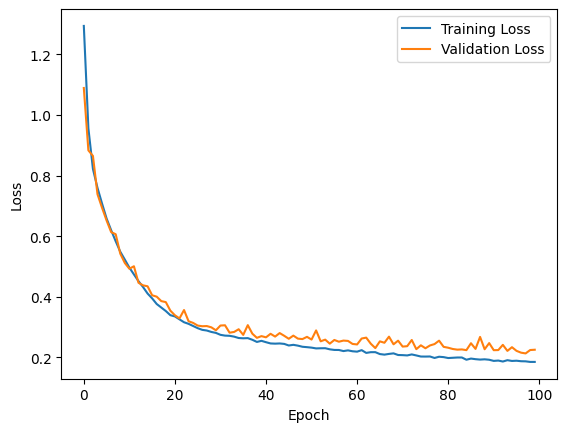

In [ ]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [ ]:
# report model accuracy on test data
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.squeeze()).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100}%')

# TODO

Test Accuracy: 91.77595021115803%


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [ ]:
import random
# print(len(X_test))
random_index = random.randint(0, len(X_test) - 1)
X_test.iloc[random_index]
# TODO: choose a random sample from test data and print it out

user_id        43.000000
Day             4.000000
origin          4.000000
Origin Lat     -0.049586
Origin Long     1.654400
start_hour      0.194921
duration        1.423144
Name: 3850, dtype: float64

In [ ]:
# TODO: predict the destination of the above sample
# print out the prediction
sample_features = X_test.iloc[random_index].values
model.eval()
predicted_class = None
with torch.no_grad():
    predicted_scores = model(torch.FloatTensor(sample_features))
    _, predicted_class = torch.max(predicted_scores, 0)
print(f"Predicted: {predicted_class}")

Predicted: 6


In [ ]:
# TODO: print out the actual destination of the above sample
print(f"Actual: {Y_test.iloc[random_index]['destination']}")

Actual: 6


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [ ]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample
label_encoder_test.inverse_transform([Y_test.iloc[random_index]['destination']])[0]

'work'

**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...



Nerual Networks seem appropriate for this type of problem cause they can detect more complex and non-linear properties when comparing with the two past models because we can add to the number of layers and nodes (make a deep nn) and resolve more complex and predict less clear predictions which maybe KNN and XGBoost are not capable of doing. But with nerual network also we need more resources and sometimes tuning the parameters for the problem can be difficult, also for simpler types of this problem with less features, maybe Neural Networks is too much, but overall, It is robust especially if the model gets more copmlicated and complex its still robust and predicts the result with great accuracy.

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts:
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage")
   
2. Checking accuracies of your models on the test set.

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).